BUILDING A MODEL IN PYTHON
After examining the statistical underpinnings of numerous algorithms, it’s
time to turn our attention to building an actual machine learning model.
Although there are various options in regards to programming languages (as
outlined in Chapter 4), for this exercise we will use Python because it is quick
to learn and it’s an effective programming language for anyone interested in
manipulating and working with large datasets.
If you don't have any experience in programming or programming with
Python, there’s no need to worry. The key purpose of this chapter is to
understand the methodology and steps behind building a basic machine
learning model.
In this exercise, we will design a house price valuation system using gradient
boosting by following these six steps:
1) Set up the development environment
2) Import the dataset
3) Scrub the dataset
4) Split the data into training and test data
5) Select an algorithm and configure its hyperparameters
6) Evaluate the results
1) Set up the development environment
The first step is to prepare our development environment. For this exercise,
we will be working in Jupyter Notebook, which is an open-source web
application that allows editing and sharing of notebooks.
You can download Jupyter Notebook from: http://jupyter.org/install.html
Jupyter Notebook can be installed using the Anaconda Distribution or
Python’s package manager, pip. There are instructions available on the
Jupyter Notebook website that outline both options. As an experienced
Python user, you may wish to install Jupyter Notebook via pip. For
beginners, I recommend selecting the Anaconda Distribution option, which
offers an easy click-and-drag setup.This particular installation option will direct you to the Anaconda website.
From there, you can select your preferred installation for Windows, macOS,
or Linux. Again, you can find instructions available on the Anaconda website
according to your choice of operating system.
After installing Anaconda to your machine, you will have access to a number
of data science applications including rstudio, Jupyter Notebook, and
graphviz for data visualization. For this exercise, you will need to select
Jupyter Notebook by clicking on “Launch” inside the Jupyter Notebook tab.

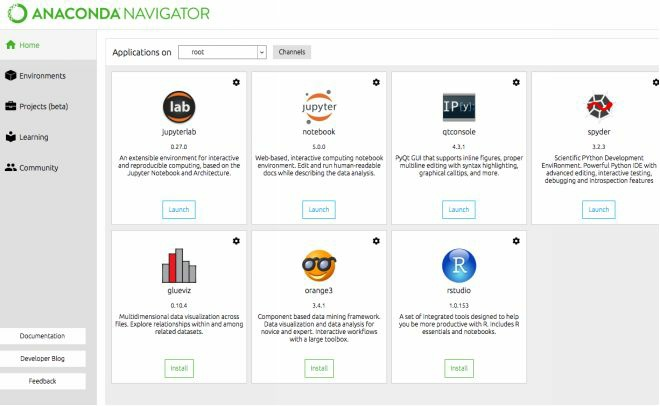

To initiate Jupyter Notebook, run the following command from the Terminal
(for Mac/Linux) or Command Prompt (for Windows):
jupyter notebook
Terminal/Command Prompt will then generate a URL for you to copy and
paste into your web browser. Example: http://localhost:8888/
Copy and paste the generated URL into your web browser to load Jupyter
Notebook. Once you have Jupyter Notebook open in your browser, click on“New” in the top right-hand corner of the web application to create a new
“Notepad” project, and then select “Python 3.”
The final step is to install the necessary libraries required to complete this
exercise. You will need to install Pandas and a number of libraries from
Scikit-learn into the notepad.
In machine learning, each project will vary in regards to the libraries required
for import. For this particular exercise, we are using gradient boosting
(ensemble modeling) and mean absolute error to measure performance.
You will need to import each of the following libraries and functions by
entering these exact commands in Jupyter Notebook:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib
Don’t worry if you don’t recognize each of the imported libraries in the code
snippet above. These libraries will be referred to in later steps.

2) Import the dataset
The next step is to import the dataset. For this exercise, I have selected a free
and publicly available dataset from kaggle.com which contains house, unit,
and townhouse prices in Melbourne, Australia. This dataset comprises data
scraped from publicly available listings posted weekly on
www.domain.com.au. The dataset contains 14,242 property listings and 21
variables including address, suburb, land size, number of rooms, price,
longitude, latitude, postcode, etc.
Please note that the property values in this dataset are expressed in Australian
Dollars—$1 AUD is approximately $0.77 USD (as of 2017).
Download the Melbourne Housing Market dataset from this link:
https://www.kaggle.com/anthonypino/melbourne-housing-market
After registering a free account and logging into kaggle.com, download the
dataset as a zip file. Next, unzip the downloaded file and import into Jupyter
Notebook. To import the dataset, you can utilize the read_csv function to
load the data into a Pandas dataframe.
df = pd.read_csv('~/Downloads/Melbourne_housing_FULL-26-09-2017.csv')This command will directly import the dataset. However, please note that the
exact file path will depend on the saved location of your dataset. For
example, if you saved the CSV file to your desktop, you would need to read
in the .csv file using the following command:
df = pd.read_csv('~/Desktop/Melbourne_housing_FULL-26-09-2017.csv')
In my case, I imported the dataset from my Downloads folder. As you move
forward in machine learning and data science, it’s important that you save
datasets and projects in standalone and named folders for organized access. If
you opt to save the .csv into the same folder as your Jupyter Notebook, you
won’t need to append a directory name or “~/.”
Next, to preview the dataframe within Jupyter Notebook, enter the following
command, with “n” representing the number of rows you wish to preview in
relation to the head row.
df.head(n=5)
Right-click and select “Run” or navigate from the Jupyter Notebook menu:
Cell > Run All

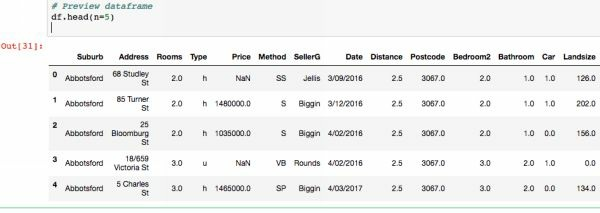

This will populate the dataset within Jupyter Notebook as shown in Figure 2.
This step is not mandatory, but it is a useful technique for reviewing your
dataset inside Jupyter Notebook.

The next stage is to scrub the dataset. Remember, scrubbing is the process of
refining your dataset. This involves modifying or removing incomplete,
irrelevant or duplicated data. It may also entail converting text-based data to
numerical values and the redesigning of features.
It is important to note that the scrubbing process can take place before or after
importing the dataset into Jupyter Notebook. For example, the creator of the
Melbourne Housing Market dataset has misspelled “Longitude” and
“Latitude” in the head columns. As we will not be examining these two
variables in our exercise, there is no need to make any changes. If, though,
we did wish to include these two variables in our model, it would be prudent
to first fix this error.
From a programming perspective, spelling mistakes in the column titles do
not pose any problems as long as we apply the same keyword spelling to
perform our commands. However, this misnaming of columns could lead to
human errors, especially if you are sharing your code with team members. To
avoid any potential confusion, it’s best to fix spelling mistakes and other
simple errors in the source file before importing the dataset into Jupyter
Notebook or another development environment. You can do this by opening
the CSV file in Microsoft Excel (or equivalent program), editing the dataset,
and then resaving it again as a CSV file.
While simple errors can be corrected within the source file, major structural
changes to the dataset such as feature engineering are best performed in the
development environment for added flexibility and to preserve the dataset for
later use. For instance, in this exercise, we will be implementing feature
engineering to remove a number of columns from the dataset, but we may
later change our mind about which columns we wish to include.
Manipulating the composition of the dataset in the development environment
is less permanent and generally much simpler and quicker than doing so
directly in the source file.

Scrubbing Process
Let’s first remove columns from the dataset that we don’t wish to include in
the model by using the del df[' '] function and entering the vector (column)
titles that we wish to remove.
# The misspellings of “longitude” and “latitude” are used, as the two misspellings were not corrected in
the source file.del df['Address']
del df['Method']
del df['SellerG']
del df['Date']
del df['Postcode']
del df['Lattitude']
del df['Longtitude']
del df['Regionname']
del df['Propertycount']
The Address, Regionname, and Propertycount columns were removed as
property location is covered in other columns (Suburb and CouncilArea) and
because we want to minimize non-numerical information (e.g. Address and
Regionname). Postcode, Latitude, and Longitude were also removed because,
again, property location is contained in the Suburb and CouncilArea columns.
My assumption is that Suburb and CouncilArea tend to have more sway in
buyers’ minds than Postcode, Latitude, and Longitude—although Address
deserves an honorable mention.
Method, SellerG, and Date were also removed because they were deemed to
have less relevance in comparison to other variables. This is not to say that
these variables don’t impact property prices, rather the other eleven
independent variables are sufficient for building a basic model. We can
decide to add any of these variables into the model later, and you may choose
to include them in your own model.
The remaining eleven independent variables (represented as X) in the dataset
are Suburb, Rooms, Type, Distance, Bedroom2, Bathroom, Car, Landsize,
BuildingArea, YearBuilt, and CouncilArea. The twelfth variable, located in
the fifth column of the downloaded dataset, is the dependent variable, which
is Price (represented as y). As mentioned, decision trees (including gradient
boosting and random forests) are adept at managing large and high-
dimensional datasets with a high number of variables.
The next step for scrubbing the dataset is to remove any missing values.
Although there are numerous methods to manage missing values (e.g.
calculating the mean, the median, or deleting missing values altogether), for
this exercise, we want to keep it as simple as possible and we’ll therefore not
be examining rows with missing values. The obvious downside is that we
have less data to analyze. As a beginner, it makes sense to master complete
datasets before adding an extra dimension of difficulty in attempting to deal
with missing values. Unfortunately, in the case of our sample dataset, we dohave a lot of missing values! Nonetheless, we still have ample rows available
to proceed with building our model.
The following Pandas function can be used to remove rows with missing
values:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
Keep in mind that it’s important to drop rows with missing values after
applying the del df function to remove columns (as shown in the previous
step). This way, there’s a better chance that more rows from the original
dataset will be preserved. Imagine dropping a whole row because it was
missing the value for a variable that would be later deleted like the post code
in our model!
Next, let’s convert columns that contain non-numerical data to numerical
values using one-hot encoding. With Pandas, one-hot encoding can be
performed using the get_dummies function:
features_df = pd.get_dummies(df, columns=['Suburb', 'CouncilArea', 'Type'])
This command converts column values for Suburb, CouncilArea, and Type
into numerical values through the application of one-hot encoding.
Next, we need to remove the “Price” column because this column will act as
our dependent variable (y) and for now we are only examining the eleven
independent variables (X).
del features_df['Price']
Finally, create X and y arrays from the dataset using the matrix data type
(as_matrix). The X array contains the independent variables and the y array
contains the dependent variable of Price.
X = features_df.as_matrix()
y = df['Price'].as_matrix()

4) Split the dataset
We are now at the stage of splitting the data into training and test segments.
For this exercise, we will proceed with a standard 70/30 split by calling theScikit-learn function below with an argument of “0.3.” The dataset’s rows are
also shuffled randomly to avoid bias using the random_state function.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

5) Select the algorithm and configure its hyperparameters
As you will recall, we are using the gradient boosting algorithm for this
exercise, as shown.
model = ensemble.GradientBoostingRegressor(
n_estimators=150,
learning_rate=0.1,
max_depth=30,
min_samples_split=4,
min_samples_leaf=6,
max_features=0.6,
loss='huber'
)
The first line is the algorithm itself (gradient boosting) and comprises just
one line of code. The lines below dictate the hyperparameters for this
algorithm.
n_estimators represents how many decision trees to build. Remember that a
high number of trees will generally improve accuracy (up to a certain point),
but it will also increase the model’s processing time. Above, I have selected
150 decision trees as an initial starting point.
learning_rate controls the rate at which additional decision trees influence
the overall prediction. This effectively shrinks the contribution of each tree
by the set learning_rate. Inserting a low rate here, such as 0.1, should
improve accuracy.
max_depth defines the maximum number of layers (depth) for each decision
tree. If “None” is selected, then nodes expand until all leaves are pure or until
all leaves contain less than min_samples_leaf. Here, I have selected a high
maximum number of layers (30), which will have a dramatic effect on the
final result, as we will see later.
min_samples_split defines the minimum number of samples required to
execute a new binary split. For example, min_samples_split = 10 means there
must be ten available samples in order to create a new branch.
min_samples_leaf represents the minimum number of samples that must
appear in each child node (leaf) before a new branch can be implemented.
This helps to mitigate the impact of outliers and anomalies in the form of a
low number of samples found in one leaf as a result of a binary split. For
example, min_samples_leaf = 4 requires there to be at least four availablesamples within each leaf for a new branch to be created.
max_features is the total number of features presented to the model when
determining the best split. As mentioned in Chapter 11, random forests and
gradient boosting restrict the total number of features shown to each
individual tree to create multiple results that can be voted upon later.
If the max_features value is an integer (whole number), the model will
consider max_features at each split (branch). If the value is a float (e.g. 0.6),
then max_features is the percentage of total features randomly selected.
Although max_features sets a maximum number of features to consider in
identifying the best split, total features may exceed the max_features limit if
no split can initially be made.
loss calculates the model's error rate. For this exercise, we are using huber
which protects against outliers and anomalies. Alternative error rate options
include ls (least squares regression), lad (least absolute deviations), and
quantile (quantile regression). Huber is actually a combination of ls and lad.
To learn more about gradient boosting hyperparameters, you may refer to the
Scikit-learn website:
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
After imputing the model’s hyperparameters, we will implement Scikit-
learn's fit function to start the model training process.
model.fit(X_train, y_train)
Lastly, we need to use Scikit-learn to save the training model as a file using
the joblib.dump function, which was imported into Jupyter Notebook in Step
1. This will allow us to use the training model again in the future for
predicting new real estate property values, without needing to rebuild the
model from scratch.
joblib.dump(model, 'house_trained_model.pkl')

6) Evaluate the results
As mentioned earlier, for this exercise we will use mean absolute error to
evaluate the accuracy of the model.
mse = mean_absolute_error(y_train, model.predict(X_train))
print ("Training Set Mean Absolute Error: %.2f" % mse)
Here, we input our y values, which represent the correct results from thetraining dataset. The model.predict function is then called on the X training
set and will generate a prediction with up to two decimal places. The mean
absolute error function will then compare the difference between the model’s
expected predictions and the actual values. The same process is repeated with
the test data.
mse = mean_absolute_error(y_test, model.predict(X_test))
print ("Test Set Mean Absolute Error: %.2f" % mse)
Let’s now run the entire model by right-clicking and selecting “Run” or
navigating from the Jupyter Notebook menu: Cell > Run All.
Wait a few seconds for the computer to process the training model. The
results, as shown below, will then appear at the bottom of the notepad.
Training Set Mean Absolute Error: 27157.02
Test Set Mean Absolute Error: 169962.99
For this exercise, our training set mean absolute error is $27,157.02 and the
test set mean absolute error is $169,962.99. This means that on average, the
training set miscalculated the actual property value by a mere $27,157.02.
However, the test set miscalculated by an average of $169,962.99.
This means that our training model was very accurate at predicting the actual
value of properties contained in the training data. While $27,157.02 may
seem like a lot of money, this average error value is low given the maximum
range of our dataset is $8 million. As many of the properties in the dataset are
in excess of seven figures ($1,000,000+), $27,157.02 constitutes a reasonably
low error rate.
But how did the model fare with the test data? These results are less accurate.
The test data provided less indicative predictions with an average error rate of
$169,962.99. A high discrepancy between the training and test data is usually
a key indicator of overfitting. As our model is tailored to the training data, it
stumbled when predicting the test data, which probably contains new patterns
that the model hasn’t adjusted for. The test data, of course, is likely to contain
slightly different patterns and new potential outliers and anomalies.
However, in this case, the difference between the training and test data is
exacerbated by the fact that we configured the model to overfit the training
data. An example of this issue was setting max_depth to “30.” Although
setting a high max_depth improves the chances of the model finding patternsin the training data, it does tend to lead to overfitting. Another possible cause
is a poor split of the training and test data, but for this model the data was
randomized using Scikit-learn.
Lastly, please take into account that because the training and test data are
shuffled randomly, your own results will differ slightly when replicating this
model on your own machine.